# Question 2 [Marks 40]
Epilepsy is a nervous system disorder that affects movement. The dataset
contains 195 records of various people with 23 features that contain
biomedical measurements. Your model will be used to differentiate
healthy people from people having the disease. Target Column is 'status'.
Identify the model with the best params. Please note: Visualisation is
mandatory. You will receive 0 marks if you do not add visualisation. Data
Link -
https://github.com/edyoda/data-science-complete-tutorial/blob/master
/Data/epilepsy.data

# Import the necessary libraries

In [ ]:
#install lib
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
url = 'https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/epilepsy.data'

# Data Analysis

### Data Cleaning

In [ ]:
#Import Dataset 
df = pd.read_csv(url)
df

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0             0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1             0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2             0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3             0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4             0.00011   0.00655   0.00908     0.01966       0.06425  ...   
..                ...       ...       ...         ...           ...  ...   
190           0.00003   0.00263   0.00259     0.00790       0.04087  ...   
191           0.00003   0.00331   0.00292     0.00994       0.02751  ...   
192           0.00008   0.00624   0.00564     0.01873       0.02308  ...   
193           0.00004   0.00370   0.00390     0.01109       0.02296  ...   
194           0.00003   0.00295   0.00317     0.00885       0.01884  ...   

     Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0        0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1        0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2        0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3        0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4        0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   
..           ...      ...     ...     ...       ...       ...       ...   
190      0.07008  0.02764  19.517       0  0.448439  0.657899 -6.538586   
191      0.04812  0.01810  19.147       0  0.431674  0.683244 -6.195325   
192      0.03804  0.10715  17.883       0  0.407567  0.655683 -6.787197   
193      0.03794  0.07223  19.020       0  0.451221  0.643956 -6.744577   
194      0.03078  0.04398  21.209       0  0.462803  0.664357 -5.724056   

      spread2        D2       PPE  
0    0.266482  2.301442  0.284654  
1    0.335590  2.486855  0.368674  
2    0.311173  2.342259  0.332634  
3    0.334147  2.405554  0.368975  
4    0.234513  2.332180  0.410335  
..        ...       ...       ...  
190  0.121952  2.657476  0.133050  
191  0.129303  2.784312  0.168895  
192  0.158453  2.679772  0.131728  
193  0.207454  2.138608  0.123306  
194  0.190667  2.555477  0.148569  

[195 rows x 24 columns]

In [ ]:
# Top 5 dataframe
df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

In [ ]:
#Rebuild Missing Data
df.isnull()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    False        False         False         False           False   
1    False        False         False         False           False   
2    False        False         False         False           False   
3    False        False         False         False           False   
4    False        False         False         False           False   
..     ...          ...           ...           ...             ...   
190  False        False         False         False           False   
191  False        False         False         False           False   
192  False        False         False         False           False   
193  False        False         False         False           False   
194  False        False         False         False           False   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0               False     False     False       False         False  ...   
1               False     False     False       False         False  ...   
2               False     False     False       False         False  ...   
3               False     False     False       False         False  ...   
4               False     False     False       False         False  ...   
..                ...       ...       ...         ...           ...  ...   
190             False     False     False       False         False  ...   
191             False     False     False       False         False  ...   
192             False     False     False       False         False  ...   
193             False     False     False       False         False  ...   
194             False     False     False       False         False  ...   

     Shimmer:DDA    NHR    HNR  status   RPDE    DFA  spread1  spread2     D2  \
0          False  False  False   False  False  False    False    False  False   
1          False  False  False   False  False  False    False    False  False   
2          False  False  False   False  False  False    False    False  False   
3          False  False  False   False  False  False    False    False  False   
4          False  False  False   False  False  False    False    False  False   
..           ...    ...    ...     ...    ...    ...      ...      ...    ...   
190        False  False  False   False  False  False    False    False  False   
191        False  False  False   False  False  False    False    False  False   
192        False  False  False   False  False  False    False    False  False   
193        False  False  False   False  False  False    False    False  False   
194        False  False  False   False  False  False    False    False  False   

       PPE  
0    False  
1    False  
2    False  
3    False  
4    False  
..     ...  
190  False  
191  False  
192  False  
193  False  
194  False  

[195 rows x 24 columns]

In [ ]:
# sum of NA values
df.isna().any().sum()

2

In [ ]:
# Drop NA value
df_new=df.dropna()
df_new

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0             0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1             0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2             0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3             0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4             0.00011   0.00655   0.00908     0.01966       0.06425  ...   
..                ...       ...       ...         ...           ...  ...   
190           0.00003   0.00263   0.00259     0.00790       0.04087  ...   
191           0.00003   0.00331   0.00292     0.00994       0.02751  ...   
192           0.00008   0.00624   0.00564     0.01873       0.02308  ...   
193           0.00004   0.00370   0.00390     0.01109       0.02296  ...   
194           0.00003   0.00295   0.00317     0.00885       0.01884  ...   

     Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0        0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1        0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2        0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3        0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4        0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   
..           ...      ...     ...     ...       ...       ...       ...   
190      0.07008  0.02764  19.517       0  0.448439  0.657899 -6.538586   
191      0.04812  0.01810  19.147       0  0.431674  0.683244 -6.195325   
192      0.03804  0.10715  17.883       0  0.407567  0.655683 -6.787197   
193      0.03794  0.07223  19.020       0  0.451221  0.643956 -6.744577   
194      0.03078  0.04398  21.209       0  0.462803  0.664357 -5.724056   

      spread2        D2       PPE  
0    0.266482  2.301442  0.284654  
1    0.335590  2.486855  0.368674  
2    0.311173  2.342259  0.332634  
3    0.334147  2.405554  0.368975  
4    0.234513  2.332180  0.410335  
..        ...       ...       ...  
190  0.121952  2.657476  0.133050  
191  0.129303  2.784312  0.168895  
192  0.158453  2.679772  0.131728  
193  0.207454  2.138608  0.123306  
194  0.190667  2.555477  0.148569  

[192 rows x 24 columns]

In [ ]:
# Delete Duplicates values
df_new.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
190    False
191    False
192    False
193    False
194    False
Length: 192, dtype: bool

### Data Visualization

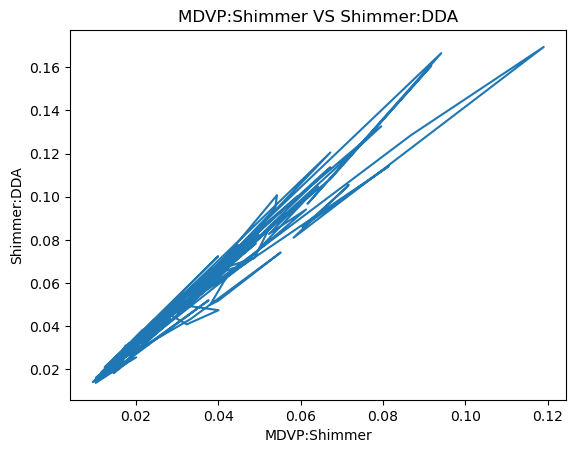

In [ ]:
# Line plot
plt.plot(df_new['MDVP:Shimmer'],df_new['Shimmer:DDA'])
plt.xlabel("MDVP:Shimmer")
plt.ylabel("Shimmer:DDA")
plt.title('MDVP:Shimmer VS Shimmer:DDA')
plt.show()

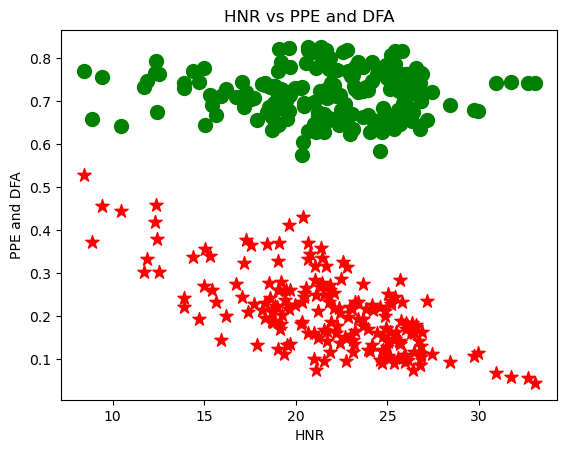

In [ ]:
# Scatter plot
plt.scatter(df_new['HNR'],df_new['PPE'],marker = '*',c='r',s=100)
plt.scatter(df_new['HNR'],df_new['DFA'],c='g',s=100)
plt.xlabel("HNR")
plt.ylabel("PPE and DFA")
plt.title('HNR vs PPE and DFA')
plt.show()

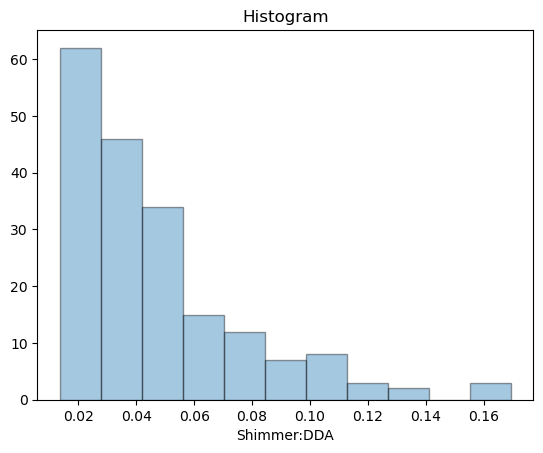

In [ ]:
# Histogram plot
sns.distplot(df_new['Shimmer:DDA'],kde=False,hist=True,bins=11,hist_kws=dict(edgecolor="k", linewidth=1))
plt.title("Histogram")
plt.show()

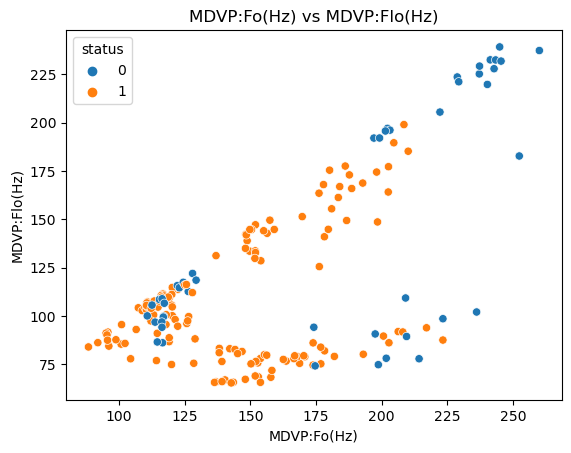

In [ ]:
# Scatter plot
sns.scatterplot(x='MDVP:Fo(Hz)',y='MDVP:Flo(Hz)',hue = 'status',data=df_new)
plt.title('MDVP:Fo(Hz) vs MDVP:Flo(Hz)')
plt.show()

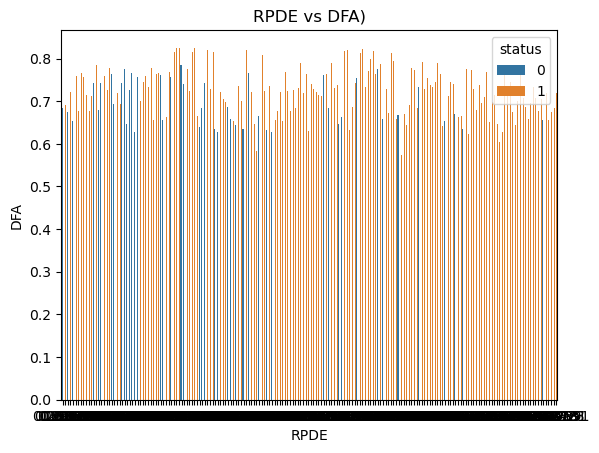

In [ ]:
# Bar plot
sns.barplot(x='RPDE',y='DFA',hue='status', data=df_new)
plt.title('RPDE vs DFA)')
plt.show()

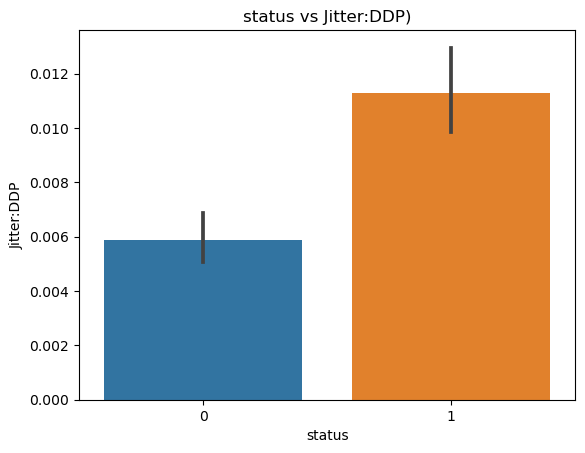

In [ ]:
# Bar plot
sns.barplot(x='status',y='Jitter:DDP', data=df_new)
plt.title('status vs Jitter:DDP)')
plt.show()

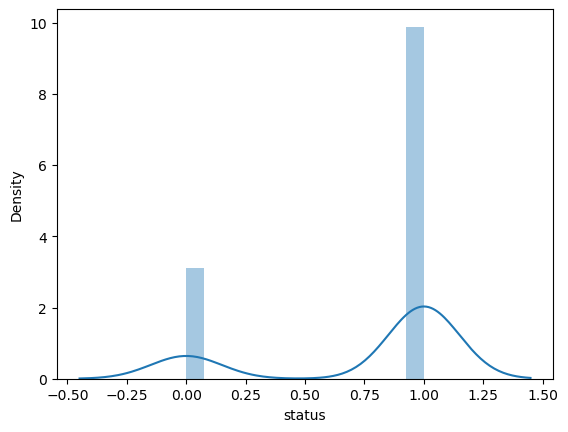

In [ ]:
# Dist plot
sns.distplot(df_new['status'])
plt.show()

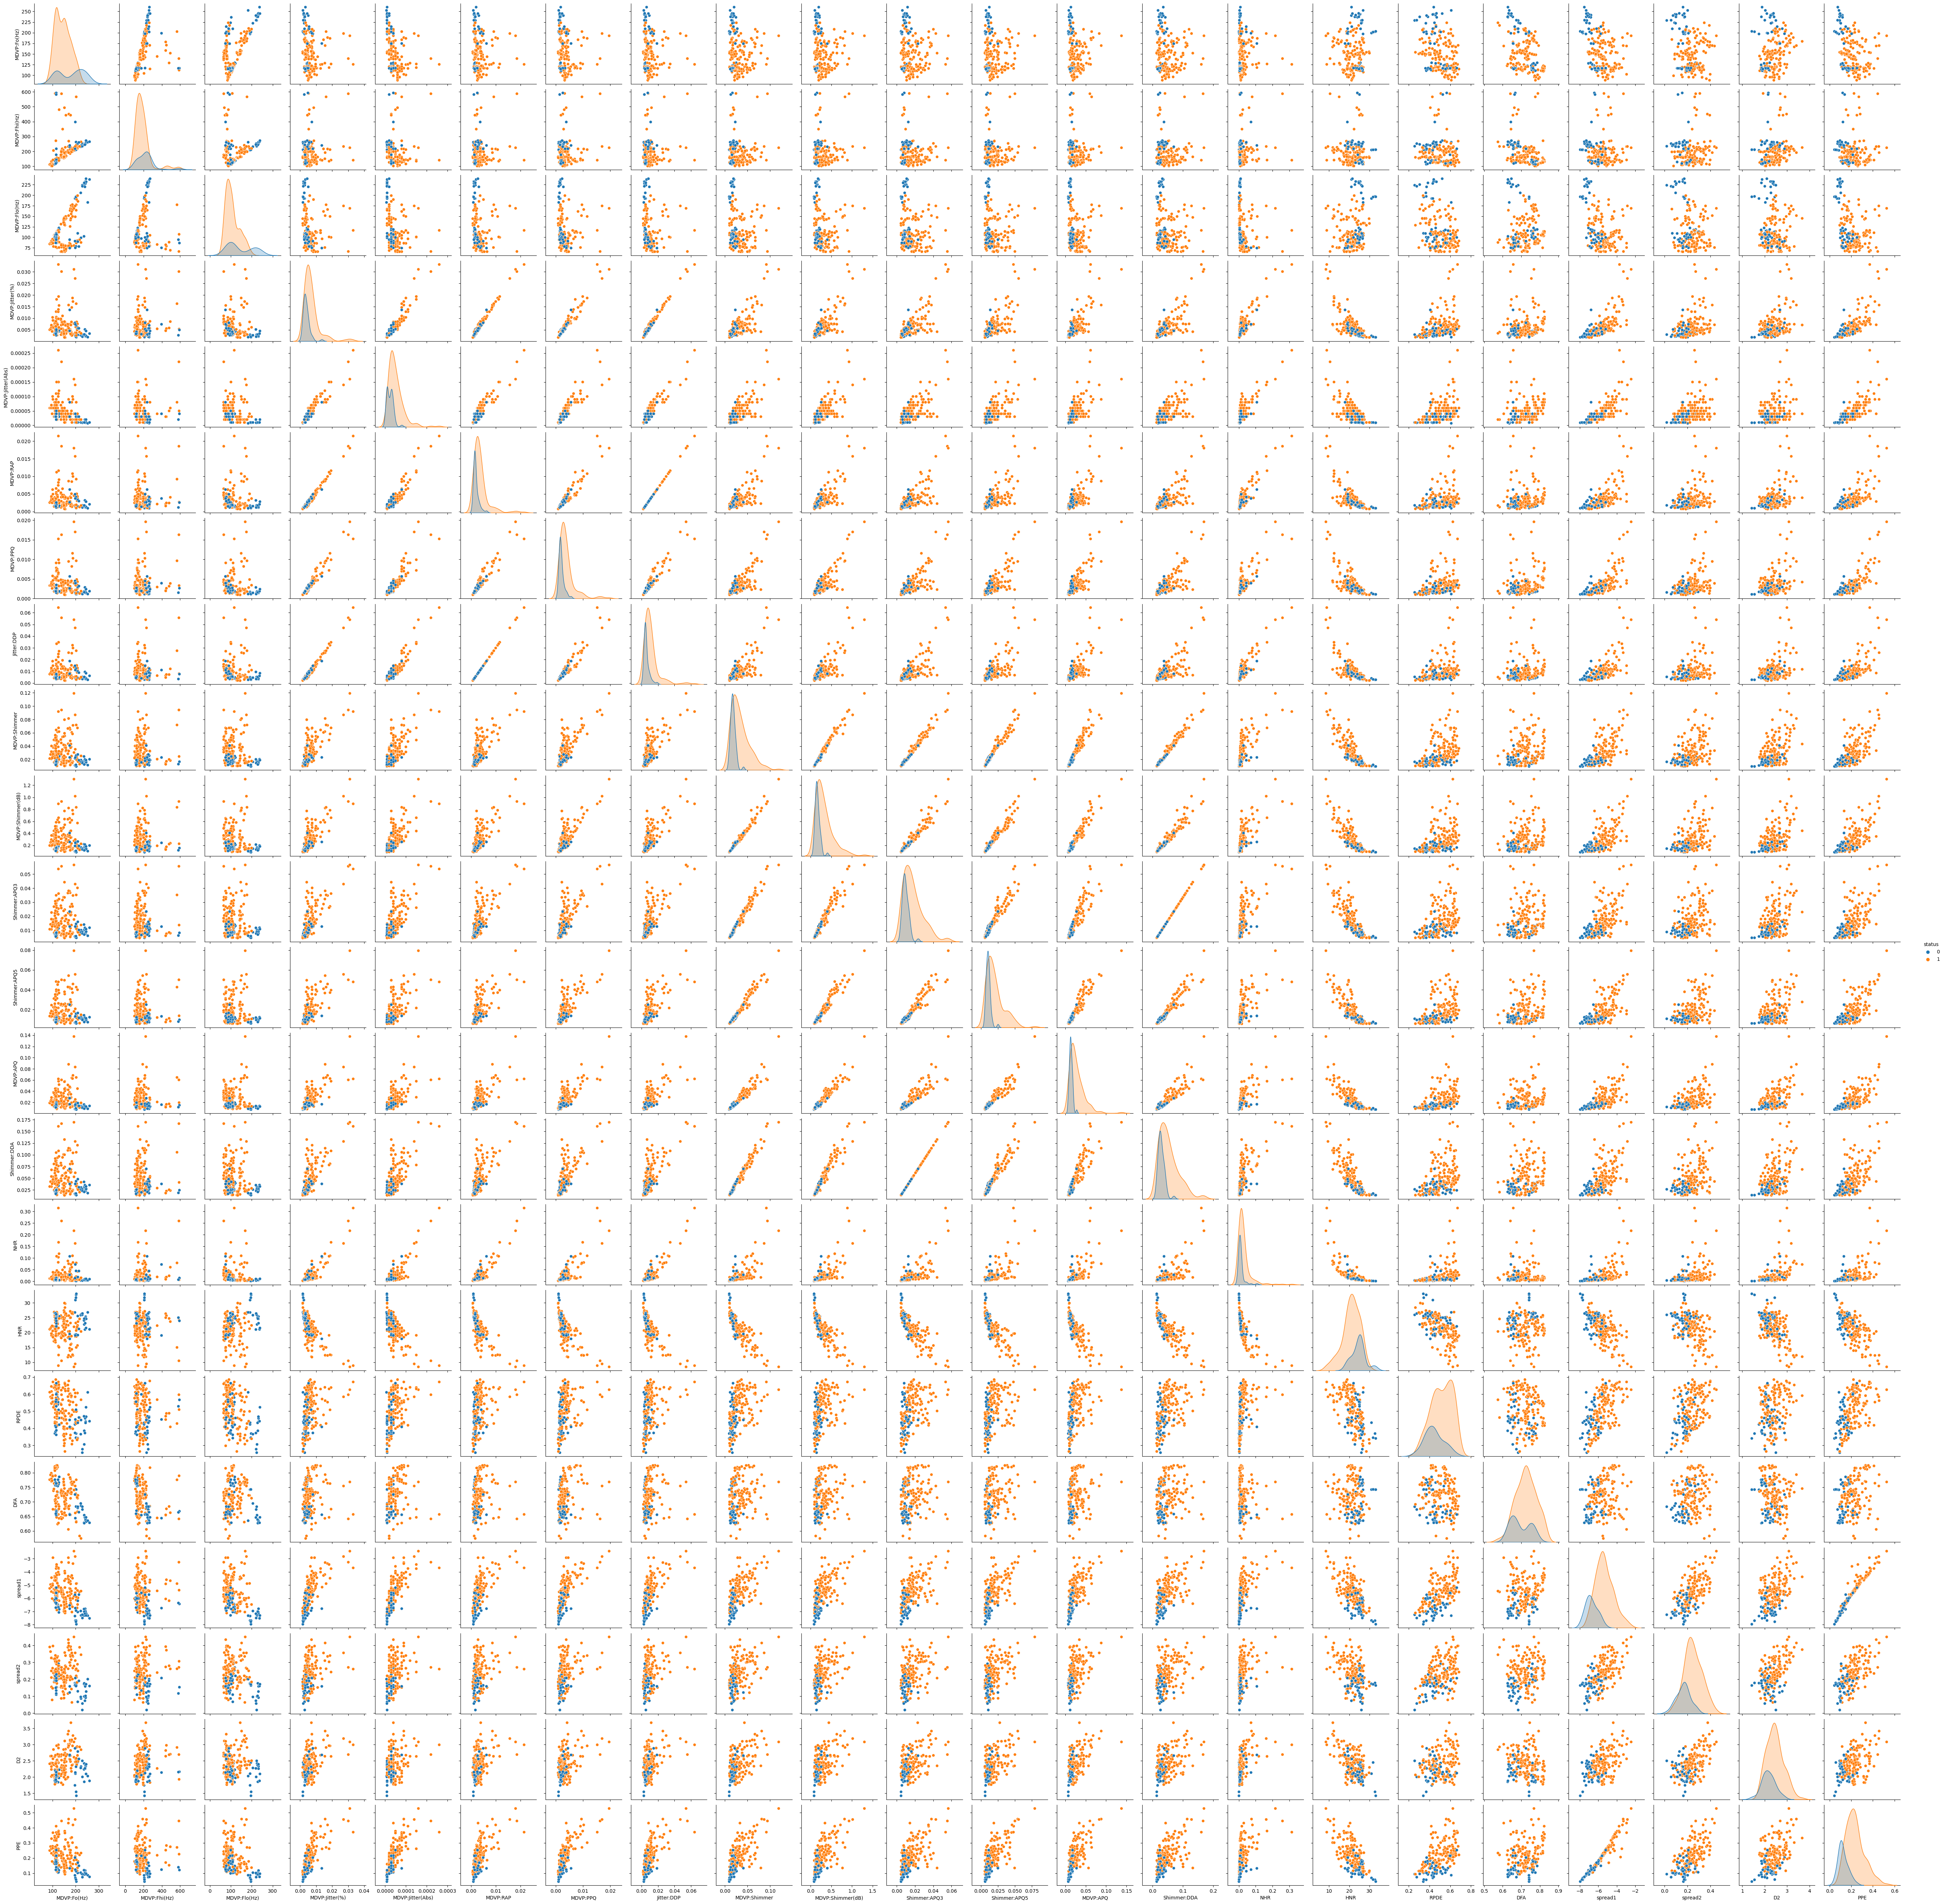

In [ ]:
# Pair plot
sns.pairplot(df_new,hue='status')
plt.show()

# Building Predictive Model

### Split the data into train and test

In [ ]:
# Total Column name
df_new.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
# Count status column
df_new['status'].value_counts()

1    146
0     46
Name: status, dtype: int64

In [ ]:
# Drop status column
X1=df_new.drop('status',axis=1)
y = df_new['status']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: status, dtype: int64

In [ ]:
# Count
y.value_counts()

1    146
0     46
Name: status, dtype: int64

In [ ]:
X1.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   MDVP:APQ  Shimmer:DDA      NHR     HNR      RPDE       DFA   spread1  \
0   0.02971      0.06545  0.02211  21.033  0.414783  0.815285 -4.813031   
1   0.04368      0.09403  0.01929  19.085  0.458359  0.819521 -4.075192   
2   0.03590      0.08270  0.01309  20.651  0.429895  0.825288 -4.443179   
3   0.03772      0.08771  0.01353  20.644  0.434969  0.819235 -4.117501   
4   0.04465      0.10470  0.01767  19.649  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 23 columns]

In [ ]:
X = X1.drop(['spread1', 'spread2','name'],axis=1)

In [ ]:
X.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  \
0   0.00370   0.00554     0.01109       0.04374             0.426   
1   0.00465   0.00696     0.01394       0.06134             0.626   
2   0.00544   0.00781     0.01633       0.05233             0.482   
3   0.00502   0.00698     0.01505       0.05492             0.517   
4   0.00655   0.00908     0.01966       0.06425             0.584   

   Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA      NHR     HNR  \
0       0.02182       0.03130   0.02971      0.06545  0.02211  21.033   
1       0.03134       0.04518   0.04368      0.09403  0.01929  19.085   
2       0.02757       0.03858   0.03590      0.08270  0.01309  20.651   
3       0.02924       0.04005   0.03772      0.08771  0.01353  20.644   
4       0.03490       0.04825   0.04465      0.10470  0.01767  19.649   

       RPDE       DFA        D2       PPE  
0  0.414783  0.815285  2.301442  0.284654  
1  0.458359  0.819521  2.486855  0.368674  
2  0.429895  0.825288  2.342259  0.332634  
3  0.434969  0.819235  2.405554  0.368975  
4  0.417356  0.823484  2.332180  0.410335

In [ ]:
# Slpitting the data into two part train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
X_train.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
168      197.569       217.627        90.794         0.00803   
115      151.872       492.892        69.085         0.00856   
44       243.439       250.912       232.435         0.00210   
17       168.778       232.181        75.603         0.00718   
5        120.552       131.162       113.787         0.00968   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
168          0.000040   0.00490   0.00448     0.01470       0.02177   
115          0.000060   0.00404   0.00385     0.01211       0.01843   
44           0.000009   0.00109   0.00137     0.00327       0.01419   
17           0.000040   0.00284   0.00387     0.00853       0.03327   
5            0.000080   0.00463   0.00750     0.01388       0.04701   

     MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
168             0.189       0.01279       0.01272   0.01439      0.03836   
115             0.235       0.00796       0.00832   0.01271      0.02389   
44              0.126       0.00777       0.00898   0.01033      0.02330   
17              0.348       0.01441       0.01893   0.03430      0.04322   
5               0.456       0.02328       0.03526   0.03243      0.06985   

         NHR     HNR      RPDE       DFA        D2       PPE  
168  0.01337  19.269  0.372222  0.725216  2.882450  0.202879  
115  0.06051  23.693  0.407701  0.662668  2.702355  0.274407  
44   0.00454  25.368  0.438296  0.635285  2.330716  0.091470  
17   0.02919  20.376  0.631099  0.605417  3.007463  0.430788  
5    0.01222  21.378  0.415564  0.825069  2.187560  0.357775

In [ ]:
X_test.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
46       245.510       262.090       231.848         0.00235   
72       120.080       139.710       111.208         0.00405   
164      102.273       142.830        85.902         0.00907   
37       176.170       185.604       163.564         0.00369   
185      116.286       177.291        96.983         0.00314   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
46            0.00001   0.00127   0.00148     0.00380       0.01608   
72            0.00003   0.00180   0.00220     0.00540       0.01706   
164           0.00009   0.00493   0.00461     0.01480       0.02814   
37            0.00002   0.00205   0.00218     0.00616       0.01851   
185           0.00003   0.00134   0.00192     0.00403       0.01564   

     MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
46              0.141       0.00906       0.00977   0.01149      0.02719   
72              0.152       0.00974       0.00925   0.01345      0.02921   
164             0.272       0.01579       0.01553   0.02073      0.04736   
37              0.168       0.00938       0.01160   0.01491      0.02814   
185             0.136       0.00667       0.00990   0.01691      0.02001   

         NHR     HNR      RPDE       DFA        D2       PPE  
46   0.00476  24.602  0.467489  0.631653  2.392122  0.097336  
72   0.00442  25.742  0.495954  0.762959  2.205024  0.188180  
164  0.03882  18.447  0.671378  0.674562  2.560422  0.367233  
37   0.00340  24.951  0.341435  0.783626  2.536527  0.173218  
185  0.00737  24.199  0.598515  0.654331  2.058658  0.214346

In [ ]:
y_train

168    0
115    1
44     0
17     1
5      1
      ..
136    1
140    1
75     1
143    1
39     1
Name: status, Length: 144, dtype: int64

In [ ]:
y_test

46     0
72     1
164    1
37     1
185    0
11     1
125    1
84     1
113    1
183    0
175    0
130    1
30     0
16     1
111    1
70     1
29     1
53     0
33     0
158    1
49     0
4      1
100    1
190    0
58     1
109    1
155    1
85     1
55     1
133    1
69     1
122    1
60     0
87     1
189    0
14     1
42     0
19     1
167    0
193    0
116    1
177    1
170    0
153    1
35     0
173    0
163    1
61     0
Name: status, dtype: int64

### Split the data into Dependent & Independent variable

In [ ]:
x = df_new.iloc[:,:-7].values
y = df_new.iloc[:,-7].values

In [ ]:
print("******Independent variable*******")
print(" ")
print(x)
print(" ")
print("******Dependent variable*********")
print(" ")
print(y)

******Independent variable*******
 
[['phon_R01_S01_1' 119.992 157.302 ... 0.06545 0.02211 21.033]
 ['phon_R01_S01_2' 122.4 148.65 ... 0.09403 0.01929 19.085]
 ['phon_R01_S01_3' 116.682 131.111 ... 0.0827 0.01309 20.651]
 ...
 ['phon_R01_S50_4' 174.688 240.005 ... 0.03804 0.10715 17.883]
 ['phon_R01_S50_5' 198.764 396.961 ... 0.03794 0.07223 19.02]
 ['phon_R01_S50_6' 214.289 260.277 ... 0.03078 0.04398 21.209]]
 
******Dependent variable*********
 
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0]


### Building Multiple Model for Good accuray

#### 1.KNN Algorithm

In [ ]:
# import the model
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Fit the the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred= knn.predict(X_test)

In [ ]:
# import the metric
from sklearn import metrics

In [ ]:
# Find the Accuracy
print('accuracy', metrics.accuracy_score(y_test, y_pred))

accuracy 0.8125


#### 2.Decision Tree Algorithm

In [ ]:
# import the model
from sklearn import tree
model= tree.DecisionTreeClassifier()

In [ ]:
# we do fit the model
model=model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Find the Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9166666666666666


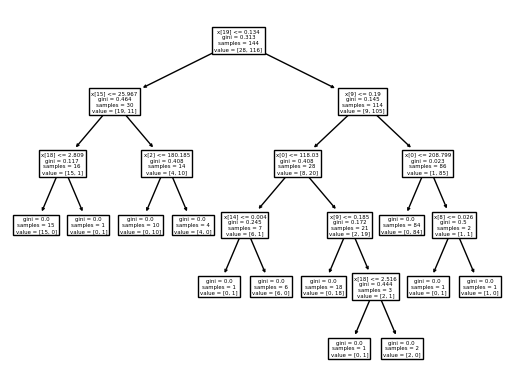

In [ ]:
# Show the Tree
tree.plot_tree(model)
plt.show()

#### 3.Random Forest Regressor

In [ ]:
# import the model
from sklearn.ensemble import RandomForestClassifier
model1= RandomForestClassifier()
model1.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# find the Accuracy
print("Accuracy:",model1.score(X_test,y_test))

Accuracy: 0.8541666666666666


In [ ]:
#if we increase the values of estimators then we got more accuracy.
model2= RandomForestClassifier(n_estimators=40)
model2.fit(X_train,y_train)
print("Accuracy:",model2.score(X_test,y_test))

Accuracy: 0.8333333333333334


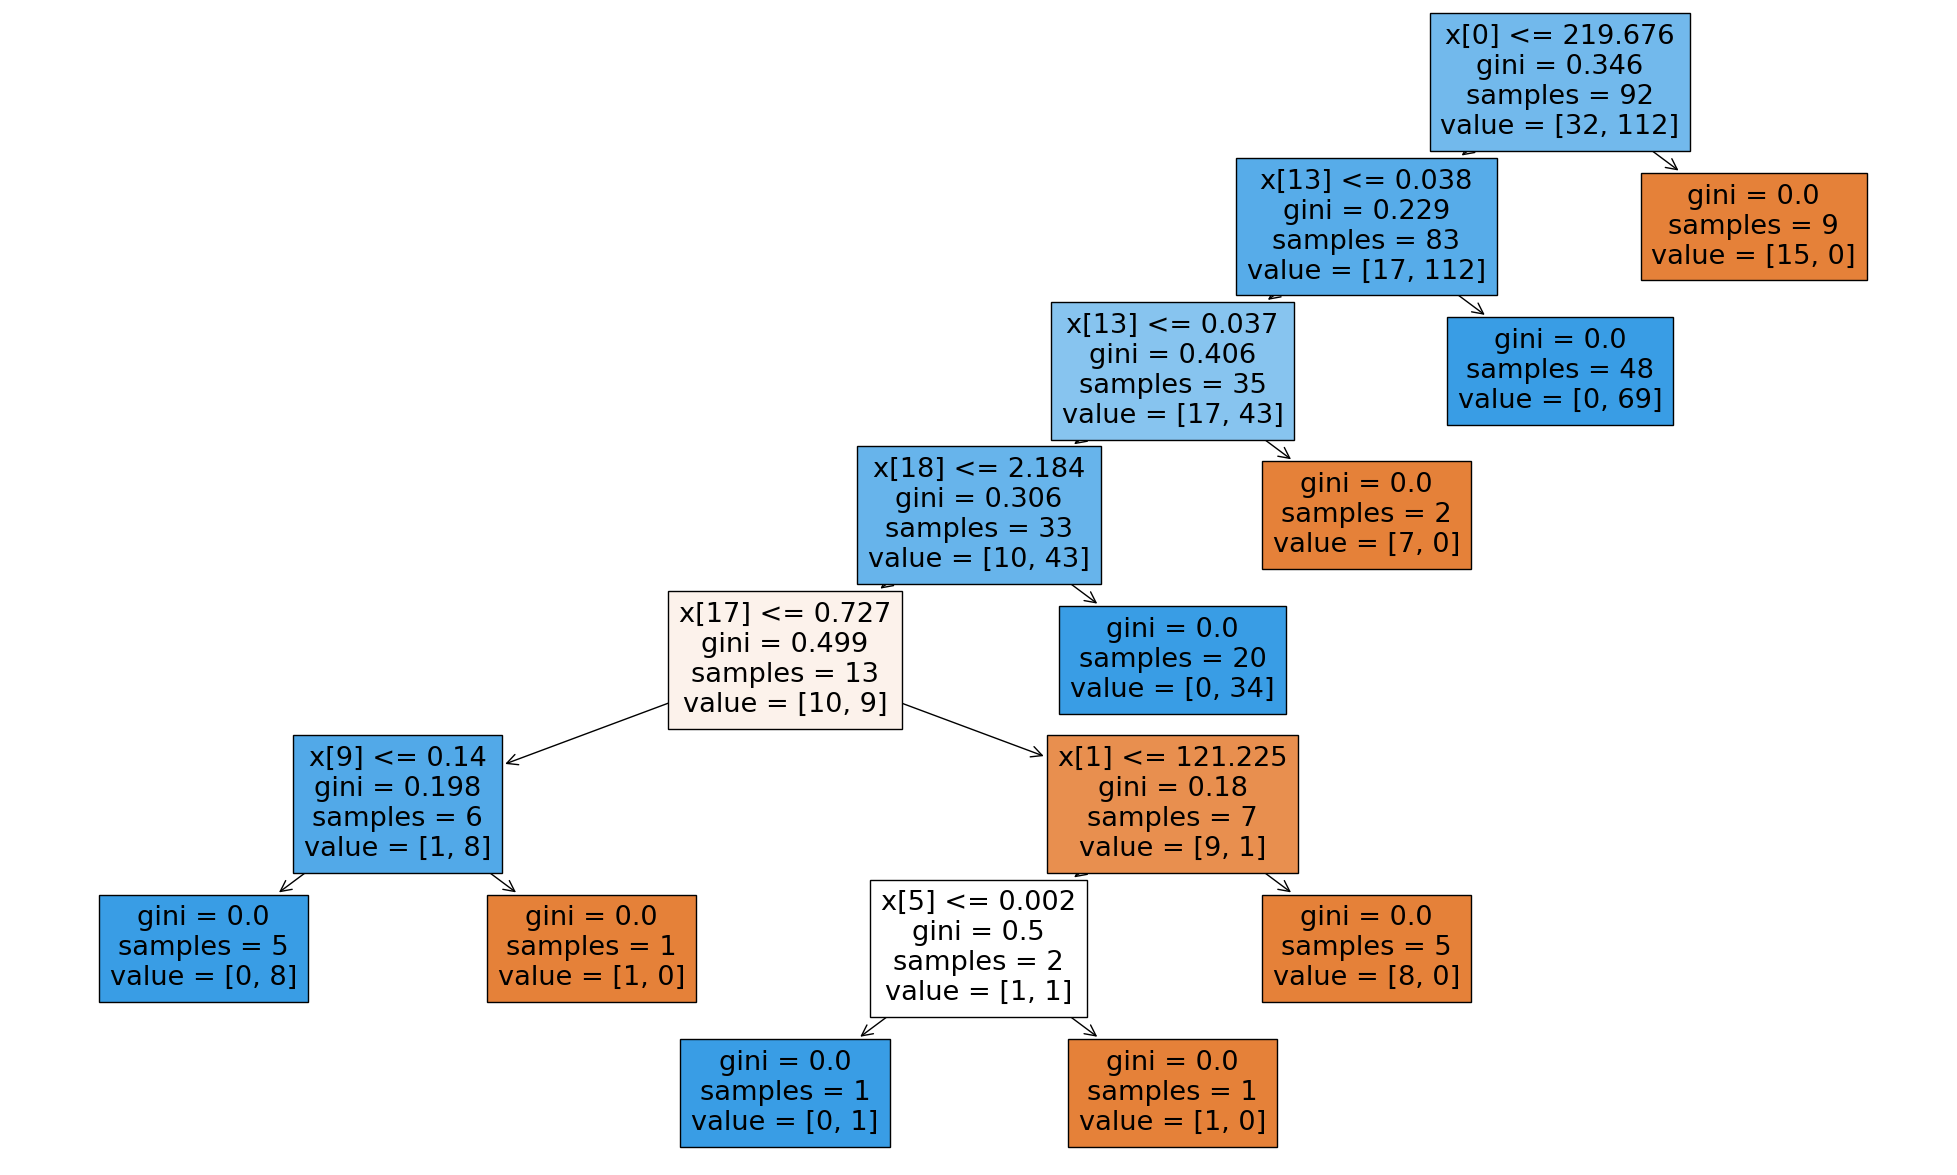

In [ ]:
# Show the graph of random forest Regressor
plt.figure(figsize=(25,15))
tree.plot_tree(model1.estimators_[1], filled= True)
plt.show()

#### 4.Naive Bayes Algorithm

In [ ]:
# import the model
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()

In [ ]:
# Fit the the model
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Pridicted values
y_pred= model.predict(X_test)

In [ ]:
# import the metric
from sklearn import metrics

In [ ]:
# find the Accuracy
print("Accuracy",metrics.accuracy_score(y_test, y_pred))

Accuracy 0.7291666666666666


# Features Selection

### Filter Method

In [ ]:
# import features selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
# Features extraction
chi_best = SelectKBest(score_func=chi2,k=4)
k_best = chi_best.fit(X,y)

# Print the score
np.set_printoptions(precision=3)
print(k_best.scores_)

k_features = k_best.transform(X)
print(k_features[0:5,:])

[2.880e+02 2.199e+02 4.292e+02 5.256e-02 5.688e-04 3.445e-02 3.355e-02
 1.033e-01 3.004e-01 3.065e+00 1.477e-01 1.871e-01 2.931e-01 4.431e-01
 4.245e-01 2.089e+01 3.673e-01 4.488e-02 1.198e+00 2.040e+00]
[[119.992 157.302  74.997  21.033]
 [122.4   148.65  113.819  19.085]
 [116.682 131.111 111.555  20.651]
 [116.676 137.871 111.366  20.644]
 [116.014 141.781 110.655  19.649]]


### Embedded Method

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X,y)

Ridge()

In [ ]:
def print_coefs(coef,name = None,sort =False):
    if name == None:
        name = ["X%s" % x for x in range(len(coef))]
    lst = zip(coef,name)
    if sort:
        lst = sorted(lst,key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s " % (round(coefs,3),name) for coefs,name in lst)

In [ ]:
print("Ridge model:",print_coefs(ridge_reg.coef_))

Ridge model: -0.003 * X0  + -0.0 * X1  + -0.001 * X2  + -0.012 * X3  + -0.0 * X4  + -0.004 * X5  + -0.005 * X6  + -0.012 * X7  + 0.025 * X8  + 0.164 * X9  + 0.012 * X10  + 0.011 * X11  + 0.021 * X12  + 0.037 * X13  + -0.209 * X14  + -0.003 * X15  + -0.082 * X16  + 0.231 * X17  + 0.305 * X18  + 0.535 * X19 


### Wrapper Method

In [ ]:
# import features selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
# Features Extraction
model_lr = LogisticRegression()
recur_fe = RFE(model_lr,step = 20)
Feature = recur_fe.fit(X,y)
print("Number of Features : %s" %(Feature.n_features_))
print("Selected features are : %s" % (Feature.support_))
print("Feature Ranking is as follow: %s" %(Feature.ranking_))

Number of Features : 10
Selected features are : [False False False False False False False False  True  True False False
  True  True  True  True  True  True  True  True]
Feature Ranking is as follow: [2 2 2 2 2 2 2 2 1 1 2 2 1 1 1 1 1 1 1 1]
